# Date times

As part of the data quality process, we often have to assess and correct that our software interprets the data appropriately.

In the previous notebook, correcting data types helped us to identify errors. It can also help us manipulate data in the correct way: for example, if numbers were stored as objects, then `"2" + "3" = "23"`, whereas if we change it to a numerical datatype, `2 + 3 = 5`.

Changing dates to the `datetime` data type allows us to manipulate and check our data in a similar way. In this notebook, we will learn about this special data type.

In [91]:
import pandas as pd

In [92]:
# orders_cl.csv
url = "https://drive.google.com/file/d/1Tla62vfu__kCqvgypZyVt2S9VuC016yH/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_cl = pd.read_csv(path)

Before we begin, we'll make a copy of the `orders_cl` DataFrame.

In [93]:
orders_df = orders_cl.copy()

Let's have a look at the top 5 rows of the DataFrame.

In [94]:
orders_df.head()

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled


## 1.&nbsp; Converting to datetime

Now, let's take a look at the datatypes pandas has given each column.

In [95]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226904 entries, 0 to 226903
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226904 non-null  int64  
 1   created_date  226904 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226904 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


We can see that `created_date` is currently an object. Let's convert it using [pd.to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html).

In [96]:
orders_df["created_date"] = pd.to_datetime(orders_df["created_date"])

Let's have a look at `.info()` again to check we now have `datetime`.



In [97]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226904 entries, 0 to 226903
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226904 non-null  int64         
 1   created_date  226904 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226904 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.9+ MB


Let's have another look at the top 5 rows - they still look the same!

In [98]:
orders_df.head()

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled


Success!!!

## 2.&nbsp; `.dt` accessor
`.dt` is to datetime what `.str` is to strings. If you have a Series that is of the datetime data type, `.dt` is an accessor that allows you to return datetime properties from the values of the Series. These properties will be indexed the same as the original Series.

Remember,  if you select one column from a DataFrame it's a Series.

In [99]:
single_column = orders_df["created_date"]

type(single_column)

pandas.core.series.Series

`.dt` can return many properties from datetime, such as the `.month`

In [100]:
orders_df.loc[:,"month"] = orders_df["created_date"].dt.month
orders_df.head()

,order_id,created_date,total_paid,state,month
0,241319,2017-01-02 13:35:40,44.99,Cancelled,1
1,241423,2017-11-06 13:10:02,136.15,Completed,11
2,242832,2017-12-31 17:40:03,15.76,Completed,12
3,243330,2017-02-16 10:59:38,84.98,Completed,2
4,243784,2017-11-24 13:35:19,157.86,Cancelled,11


If we'd rather have the month as a name, as oppossed to a number, that's also possible using `.month_name()`.

In [101]:
orders_df.loc[:,"month_name"] = orders_df["created_date"].dt.month_name()
orders_df.head()

,order_id,created_date,total_paid,state,month,month_name
0,241319,2017-01-02 13:35:40,44.99,Cancelled,1,January
1,241423,2017-11-06 13:10:02,136.15,Completed,11,November
2,242832,2017-12-31 17:40:03,15.76,Completed,12,December
3,243330,2017-02-16 10:59:38,84.98,Completed,2,February
4,243784,2017-11-24 13:35:19,157.86,Cancelled,11,November


We can also return the `.year`.

In [102]:
orders_df.loc[:,"year"] = orders_df["created_date"].dt.year
orders_df.head()

,order_id,created_date,total_paid,state,month,month_name,year
0,241319,2017-01-02 13:35:40,44.99,Cancelled,1,January,2017
1,241423,2017-11-06 13:10:02,136.15,Completed,11,November,2017
2,242832,2017-12-31 17:40:03,15.76,Completed,12,December,2017
3,243330,2017-02-16 10:59:38,84.98,Completed,2,February,2017
4,243784,2017-11-24 13:35:19,157.86,Cancelled,11,November,2017


Sometimes the properties seem obvious, but don't always return what we think they would. `.day` returns the day of the month, not the day of the week.

In [103]:
orders_df.loc[:,"day"] = orders_df["created_date"].dt.day
orders_df.head()

,order_id,created_date,total_paid,state,month,month_name,year,day
0,241319,2017-01-02 13:35:40,44.99,Cancelled,1,January,2017,2
1,241423,2017-11-06 13:10:02,136.15,Completed,11,November,2017,6
2,242832,2017-12-31 17:40:03,15.76,Completed,12,December,2017,31
3,243330,2017-02-16 10:59:38,84.98,Completed,2,February,2017,16
4,243784,2017-11-24 13:35:19,157.86,Cancelled,11,November,2017,24


Day of the week is accessed through either `weekday` or `day_name`.

In [104]:
orders_df.loc[:,"weekday"] = orders_df["created_date"].dt.weekday
orders_df.loc[:,"day_of_week"] = orders_df["created_date"].dt.day_name()
orders_df.head()

,order_id,created_date,total_paid,state,month,month_name,year,day,weekday,day_of_week
0,241319,2017-01-02 13:35:40,44.99,Cancelled,1,January,2017,2,0,Monday
1,241423,2017-11-06 13:10:02,136.15,Completed,11,November,2017,6,0,Monday
2,242832,2017-12-31 17:40:03,15.76,Completed,12,December,2017,31,6,Sunday
3,243330,2017-02-16 10:59:38,84.98,Completed,2,February,2017,16,3,Thursday
4,243784,2017-11-24 13:35:19,157.86,Cancelled,11,November,2017,24,4,Friday


We even have the option to extract the properties of the datetime as a string using `.strftime()`. Inside the brackets we place the code for how we'd like the string to be written.

In [105]:
orders_df["date_as_string"] = orders_df["created_date"].dt.strftime("%A, %d %b %y")
orders_df.head()

,order_id,created_date,total_paid,state,month,month_name,year,day,weekday,day_of_week,date_as_string
0,241319,2017-01-02 13:35:40,44.99,Cancelled,1,January,2017,2,0,Monday,"Montag, 02 Jan 17"
1,241423,2017-11-06 13:10:02,136.15,Completed,11,November,2017,6,0,Monday,"Montag, 06 Nov 17"
2,242832,2017-12-31 17:40:03,15.76,Completed,12,December,2017,31,6,Sunday,"Sonntag, 31 Dez 17"
3,243330,2017-02-16 10:59:38,84.98,Completed,2,February,2017,16,3,Thursday,"Donnerstag, 16 Feb 17"
4,243784,2017-11-24 13:35:19,157.86,Cancelled,11,November,2017,24,4,Friday,"Freitag, 24 Nov 17"


A full list of the properties and methods that can be returned with `.dt` can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#datetimelike-properties).

A full list of `strftime()` format codes can be found [here](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

## 3.&nbsp; Datetime aggregates
Datetime is not limited to only returning properties, we can also perform aggregates with datetime.

We can utilise methods such as `.min()` and `.max()`, which will show us the earliest and the latest date in the Series.

In [106]:
orders_df["created_date"].min(), orders_df["created_date"].max()

(Timestamp('2017-01-01 00:07:19'), Timestamp('2018-03-14 13:58:36'))

This also quickly allows you to see the timespan of the Series.

In [107]:
orders_df["created_date"].max() - orders_df["created_date"].min()

Timedelta('437 days 13:51:17')

> **Note:** We won't dive deep into the differences between `Timestamp`, `Timedelta`, and the other time data types. For now, just know that a `Timestamp` is a point in time, whereas `Timedelta` represents a span of time. If you have the time, you can learn more [here](https://pandas.pydata.org/docs/user_guide/timeseries.html#overview).

We can also use `.mean()` or `.median()`.

In [108]:
orders_df["created_date"].mean(), orders_df["created_date"].median()

(Timestamp('2017-09-06 14:58:03.124224512'),
 Timestamp('2017-10-16 21:00:01.500000'))

Or, even use `.describe()` to get an idea of the whole Series.

In [109]:
orders_df["created_date"].describe()

count                           226904
mean     2017-09-06 14:58:03.124224512
min                2017-01-01 00:07:19
25%      2017-05-17 08:01:00.750000128
50%         2017-10-16 21:00:01.500000
75%      2017-12-24 15:56:53.249999872
max                2018-03-14 13:58:36
Name: created_date, dtype: object

## 4.&nbsp; Filtering by datetime
Datetime is also useful to find information at, or in between, certain points in time.

For example, we can find all the orders created in 2018.

In [110]:
date_filtering_df = orders_cl.copy()
date_filtering_df["created_date"] = pd.to_datetime(date_filtering_df["created_date"])

In [111]:
date_filtering_df.loc[date_filtering_df["created_date"].dt.year == 2018, :].head()

,order_id,created_date,total_paid,state
11,247524,2018-01-09 14:21:34,167.98,Completed
27,256434,2018-02-26 07:32:21,39.99,Pending
29,256799,2018-02-16 09:44:42,20.97,Completed
33,258155,2018-01-22 18:51:50,40.76,Completed
51,264244,2018-01-29 15:33:06,141.97,Completed


Or, all the orders in March.

In [112]:
date_filtering_df.loc[date_filtering_df["created_date"].dt.month == 3, :].head()

,order_id,created_date,total_paid,state
39,259638,2017-03-02 20:12:59,387.60,Pending
72,271587,2017-03-08 17:23:47,20.98,Pending
73,271644,2017-03-01 13:11:40,21.98,Pending
74,272512,2018-03-04 11:35:15,114.98,Completed
85,279405,2017-03-12 19:01:08,59.98,Pending


With the code above, we get all of the orders from March of any year (in this case, both 2017 and 2018). What if want just the orders from March of one year?

When selecting a particular period of time, we have a few options. The most obvious - based on the code cells above - is to use 2 clauses in `.loc`.

When passing multiple clauses to `.loc`, you have to wrap them in parentheses.  You also have to use them in combination with logical operators (`&` for "and", `|` for "or", `~` for "not").

In [113]:
date_filtering_df.loc[(date_filtering_df["created_date"].dt.month == 3) & (date_filtering_df["created_date"].dt.year == 2018), :].head()

,order_id,created_date,total_paid,state
74,272512,2018-03-04 11:35:15,114.98,Completed
140,294278,2018-03-04 20:04:01,173.98,Completed
25299,324779,2018-03-02 15:08:16,1874.99,Completed
37506,336990,2018-03-03 23:08:42,223.97,Completed
44901,344394,2018-03-09 16:47:11,39.98,Completed


This is good to give us a particular month. However, we can use the pandas method `.between()` to give us greater flexibility. With `.between()` we can search between any 2 datetimes we need.

In [114]:
date_filtering_df.loc[date_filtering_df["created_date"].between("2018-03-01", "2018-04-01")].head()

,order_id,created_date,total_paid,state
74,272512,2018-03-04 11:35:15,114.98,Completed
140,294278,2018-03-04 20:04:01,173.98,Completed
25299,324779,2018-03-02 15:08:16,1874.99,Completed
37506,336990,2018-03-03 23:08:42,223.97,Completed
44901,344394,2018-03-09 16:47:11,39.98,Completed


There are a couple of other ways of filtering periods of time. We won't go through these in class as the 2 methods above are more than enough for the moment. However, we'll leave them commented out below for those with inquisitive minds.

In [115]:
# date_filtering_df.loc[date_filtering_df["created_date"].dt.strftime("%Y-%m") == "2018-03"].head()

In [116]:
# date_filtering_df.loc[date_filtering_df["created_date"].dt.to_period("M") == "2018-03"].head()

## 5.&nbsp; Grouping datetime with `.resample()`

While you may already be familiar with grouping data, working with datetime data benefits greatly from the use of `.resample()`. It provides a more efficient and intuitive way to group datetime-based data.

**To use `.resample()`, you need to specify the following:**

* Time Frequency: Define the intervals for grouping the data using a "frequency string" (e.g.,  `"h"` for hourly intervals, `"D"` for daily, `"W"` for weekly, `"5min"` for 5-minute — notice how a number and frequency work together in this last one). You can find the complete list of frequency strings [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects).

* Datetime column: By default, the index will be resampled. Use the `on` parameter to specify the column to group by.

* Numerical Columns: Indicate which numeric column(s) you want to aggregate.

* Aggregation Function: Choose a function to apply, such as `.sum()`, `.count()`, or `.mean()`.

**Why use .resample() for time-series data?**     
`.resample()` is specifically designed for time-series data, which typically requires equally spaced datetime intervals. Unlike traditional grouping methods, `.resample()` ensures that missing time intervals are included in the result as indices, with aggregated values like 0 filling the gaps. This behavior is ideal for analyzing datasets with time-based patterns.

In [117]:
data = {
    "date": ["2024-01-10","2024-01-15","2024-03-15","2024-03-18"],
    "product_quantity":[5,3,4,9]
}

data_df = pd.DataFrame(data)
data_df["date"] = pd.to_datetime(data_df["date"])

Let's compare the results of `.groupby()` and `.resample()`

In [118]:
(
    data_df
    .groupby([data_df["date"].dt.year,
              data_df["date"].dt.month])
    ["product_quantity"]
    .sum()
)

date  date
2024  1        8
      3       13
Name: product_quantity, dtype: int64

In [119]:
(
    data_df
    .resample("ME", on="date") # "ME" groups on month-end
    ["product_quantity"]
    .sum()
)

date
2024-01-31     8
2024-02-29     0
2024-03-31    13
Freq: ME, Name: product_quantity, dtype: int64

Not only is the `.resample()` statement more compact to write, the output contains an entry for February 2024, providing a more consistent one-month spacing between entries.

# Challenges

### Challenge 1.

What's the latest order?

In [120]:
orders_df['created_date'].max()

Timestamp('2018-03-14 13:58:36')

### Challenge 2.

Use `.strftime()` to print out the latest order as "Wed, 14/03/2018".

In [121]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US')
orders_df['created_date'].nlargest(1).dt.strftime("%a, %d/%m/%Y")

226903    Wed, 14/03/2018
Name: created_date, dtype: object

### Challenge 3.

What's the order number of the first order sold in June 2017?

In [122]:
orders_df.loc[orders_df['created_date'].dt.strftime('%Y-%m') == '2017-06'].nsmallest(1,'created_date')["order_id"]

61563    361104
Name: order_id, dtype: int64

### Challenge 4.

How many orders, regardless of state, were processed between 15th April 2017 and 6th May 2017?

In [123]:
#orders_df.loc[orders_df['created_date'].between('2017-04-15 00:00:00','2017-05-06 23:59:59')].sort_values(['created_date'],ascending=False)
#orders_df.loc[orders_df['created_date'].between('2017-04-15 00:00:00','2017-05-06 23:59:59')].sort_values(['created_date'],ascending=False)
orders_df['created_date'].between('2017-04-15 00:00:00','2017-05-06 23:59:59').sum()

np.int64(7073)

### Challenge 5.

Often as not, you may wish not only to read grouped information, but plot it.     
Use pandas `.plot()` to create a daily graph for the number of orders placed.

<Axes: xlabel='created_date'>

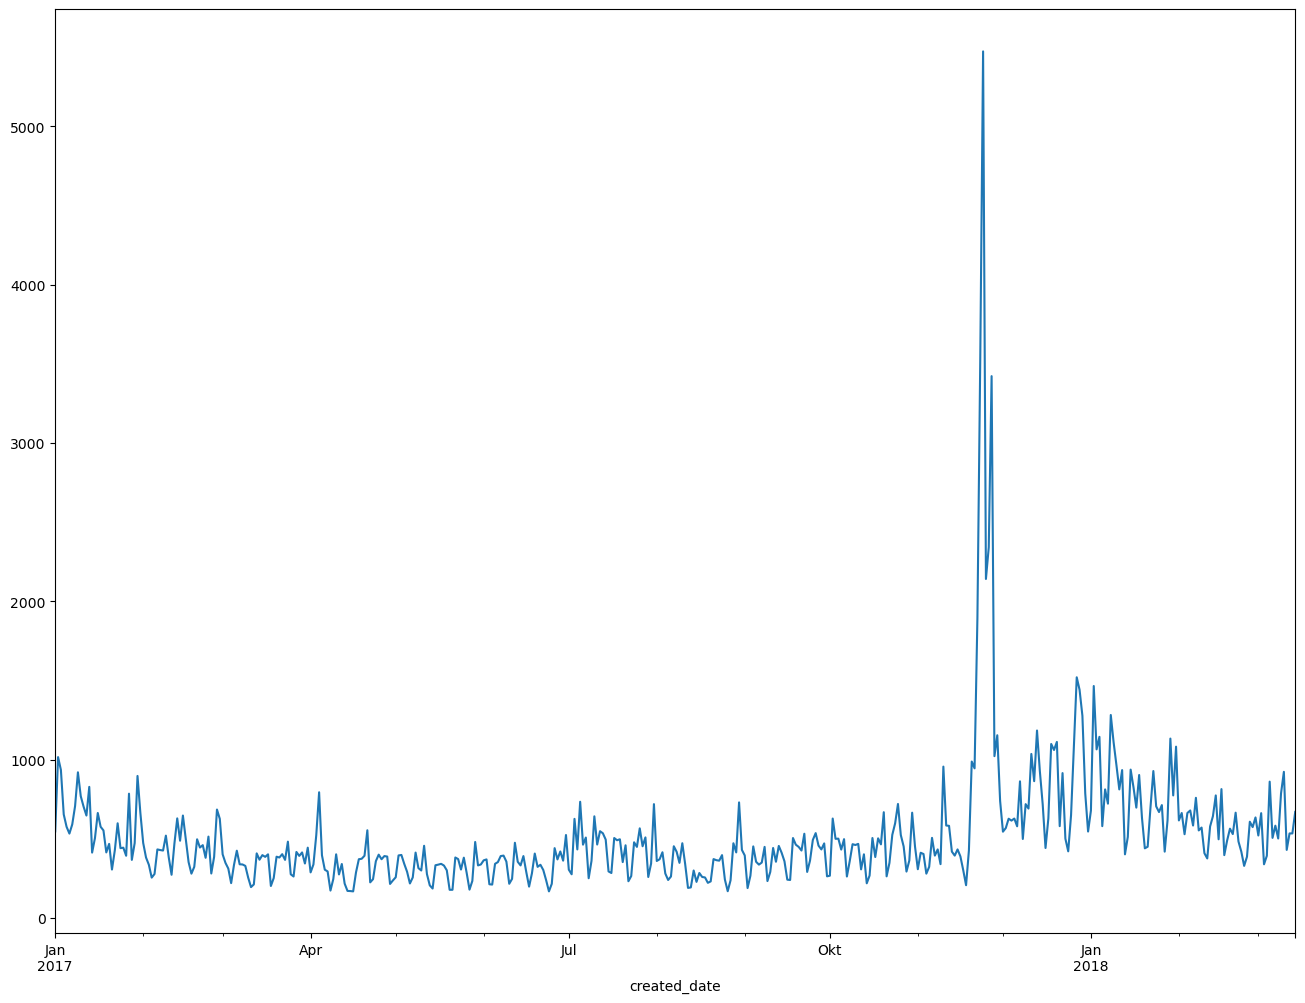

In [125]:
orders_df.resample('D',on='created_date')['order_id'].size().plot(kind='line',figsize=(16, 12))